In [1]:
#!pip install keras

In [2]:
#!pip install tensorflow

# View first few images from mnist dataset

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


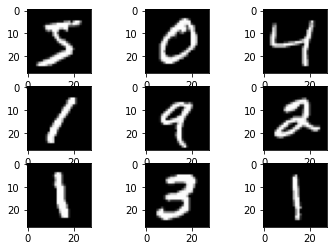

In [3]:
# loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [4]:
trainX.shape[0]

60000

# CNN model diagram - example

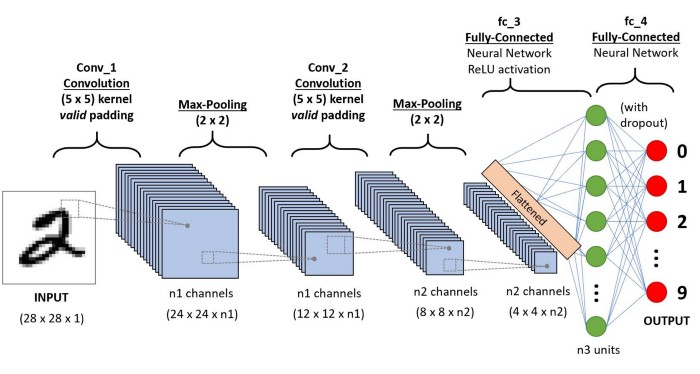

# CNN models - to be evaluated

| Model 1       | Model 2       | Model 3       | Model 4        | Model 5       |
| ------------- | ------------- | ------------- | -------------- | ------------- |
| CONV1(kernal=3x3,s=1)|CONV1(kernal=5x5,s=1)|CONV1(kernal=3x3,s=1)|CONV1(kernal=5x5,s=1)|CONV1(kernal=3x3,s=1)|
| POOL1(pool=2x2)|POOL1(pool=2x2)|POOL1(pool=2x2)|POOL1(pool=2x2)|POOL1(pool=2x2)|
| FC1(units=100)| FC1(units=100)|CONV2(kernal=3x3,s=1)| CONV2(kernal=5x5,s=1)|CONV2(kernal=3x3,s=1)|
| Softmax(units=10)|Softmax(units=10)| POOL2(pool=2x2)| POOL2(pool=2x2)| CONV3(kernal=3x3,s=1)|
|               |               | FC1(units=100)|FC1(units=100)| POOL2(pool=2x2)|
|               |               | Softmax(units=10)|Softmax(units=10)| FC1(units=100)|
|               |               |               |                | Softmax(units=10)|

# Functions

In [5]:
# deeper cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [6]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [7]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [8]:
# define cnn model - 1 convolution (filter: 3x3), 1 pooling (pool size: 2x2) 
def define_model_1conv_1pool_3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# define cnn model - 1 convolution (filter: 5x5), 1 pooling (pool size: 2x2) 
def define_model_1conv_1pool_5():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# define cnn model - 2 convolution (filter: 3x3), 2 pooling (pool size: 2x2)
def define_model_2conv_2pool_3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# define cnn model - 2 convolution (filter: 5x5), 2 pooling (pool size: 2x2)
def define_model_2conv_2pool_5():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# define cnn model - 3 convolution (filter: 3x3), 2 pooling (pool size: 2x2)
def define_model_3conv_2pool_3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# define cnn model based on parameter
def define_model(cnn=1):
    if cnn==1:
        model = define_model_1conv_1pool_3()
        print('cnn with 1 convolution(3x3), 1 pooling(2x2).')
    elif cnn==2:
        model = define_model_1conv_1pool_5()
        print('cnn with 1 convolution(5x5), 1 pooling(2x2).')
    elif cnn==3:
        model = define_model_2conv_2pool_3()
        print('cnn with 2 convolution(3x3), 2 pooling(2x2).')
    elif cnn==4:
        model = define_model_2conv_2pool_5()
        print('cnn with 2 convolution(5x5), 2 pooling(2x2).')
    elif cnn==5:
        model = define_model_3conv_2pool_3()
        print('cnn with 3 convolution(3x3), 2 pooling(2x2).')
    else:
        model = define_model_1conv_1pool_3()
        print('default cnn with 1 convolution(3x3), 1 pooling(2x2).')
    return model

In [14]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5, cnn=1):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model(cnn)
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [15]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(3, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(3, 1, 3)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [16]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [17]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

In [18]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
    # define subplot
    pyplot.subplot(330 + 1)
    # plot raw pixel data
    pyplot.imshow(img, cmap=pyplot.get_cmap('gray'))
    # show the figure
    pyplot.show()
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# Pipelines

In [19]:
# run and evaluate a model
def run_and_evaluate_trainset(cnn=1):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY, n_folds=5, cnn=cnn)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

In [20]:
# train the model and save the final model to file
def run_trainset_and_save_model(cnn=1):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model(cnn)
    # fit model
    model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
    # save model
    model.save('final_model.h5')

In [21]:
# load the saved model and test the testset
def load_model_and_test_testset():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # load model
    model = load_model('final_model.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [22]:
# load an image and predict the class
def run_example():
    # load the image
    img = load_image('./images/sample_image.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    digit = model.predict(img)
    class_x=np.argmax(digit,axis=1)
    print(class_x)

# Entry point - build and evaluate model on trainset

> 98.458
> 98.800
> 98.600
> 98.800
> 98.692


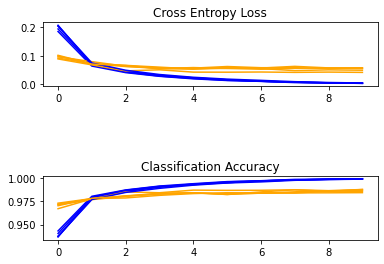

Accuracy: mean=98.670 std=0.130, n=5


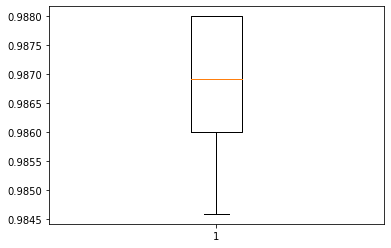

In [23]:
# entry point, evaluate trainset - model 1
run_and_evaluate_trainset(1)

cnn with 1 convolution(5x5), 1 pooling(2x2).
> 98.617
cnn with 1 convolution(5x5), 1 pooling(2x2).
> 98.633
cnn with 1 convolution(5x5), 1 pooling(2x2).
> 98.817
cnn with 1 convolution(5x5), 1 pooling(2x2).
> 98.983
cnn with 1 convolution(5x5), 1 pooling(2x2).
> 98.850


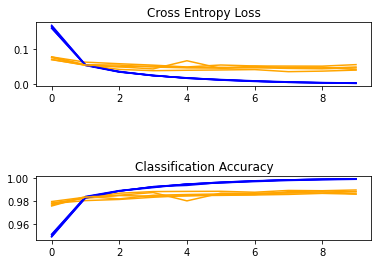

Accuracy: mean=98.780 std=0.138, n=5


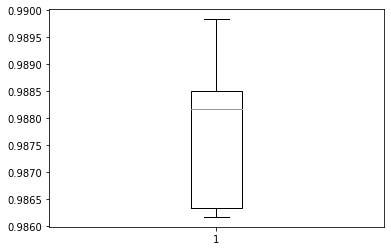

In [24]:
# entry point, evaluate trainset - model 2
run_and_evaluate_trainset(2)

cnn with 2 convolution(3x3), 2 pooling(2x2).
> 98.917
cnn with 2 convolution(3x3), 2 pooling(2x2).
> 98.983
cnn with 2 convolution(3x3), 2 pooling(2x2).
> 98.925
cnn with 2 convolution(3x3), 2 pooling(2x2).
> 99.200
cnn with 2 convolution(3x3), 2 pooling(2x2).
> 98.933


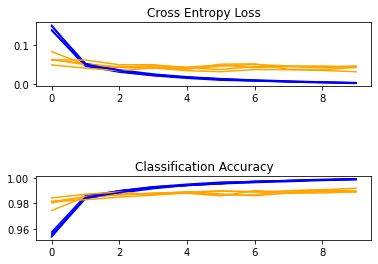

Accuracy: mean=98.992 std=0.107, n=5


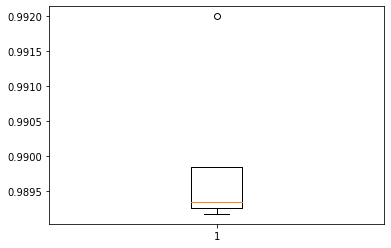

In [25]:
# entry point, evaluate trainset - model 3
run_and_evaluate_trainset(3)

cnn with 2 convolution(5x5), 2 pooling(2x2).
> 99.000
cnn with 2 convolution(5x5), 2 pooling(2x2).
> 98.908
cnn with 2 convolution(5x5), 2 pooling(2x2).
> 98.933
cnn with 2 convolution(5x5), 2 pooling(2x2).
> 99.083
cnn with 2 convolution(5x5), 2 pooling(2x2).
> 98.558


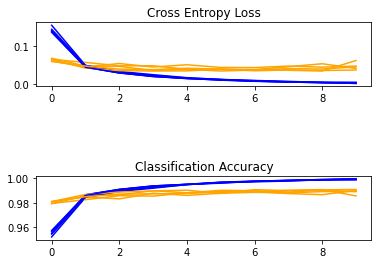

Accuracy: mean=98.897 std=0.180, n=5


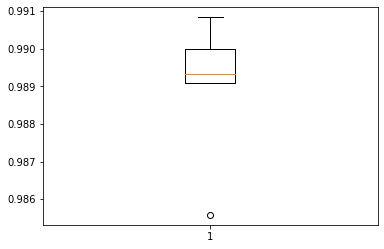

In [26]:
# entry point, evaluate trainset - model 4
run_and_evaluate_trainset(4)

cnn with 3 convolution(3x3), 2 pooling(2x2).
> 98.467
cnn with 3 convolution(3x3), 2 pooling(2x2).
> 98.892
cnn with 3 convolution(3x3), 2 pooling(2x2).
> 99.050
cnn with 3 convolution(3x3), 2 pooling(2x2).
> 99.050
cnn with 3 convolution(3x3), 2 pooling(2x2).
> 99.125


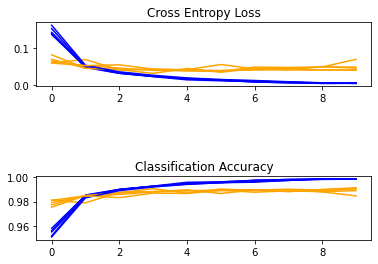

Accuracy: mean=98.917 std=0.238, n=5


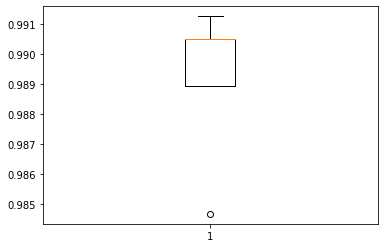

In [27]:
# entry point, evaluate trainset - model 5
run_and_evaluate_trainset(5)

### Comparison among 5 models

|| Model 1       | Model 2       | Model 3       | Model 4        | Model 5       |
| ------------- | ------------- | ------------- | ------------- | -------------- | ------------- |
|Mean score of train set (5-fold cross validation)| 98.670|98.780|98.992|98.897|98.917|

# Entry point - others

In [28]:
# entry point, train and save the model by use model 3
run_trainset_and_save_model(cnn=3)

cnn with 2 convolution(3x3), 2 pooling(2x2).


In [29]:
# entry point, load model and test
load_model_and_test_testset()

> 99.200


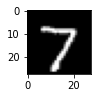

[7]


In [30]:
# entry point, run the example
run_example()

# References

1. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
2. https://www.youtube.com/watch?v=ArPaAX_PhIs&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF